In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import model_selection, datasets, metrics, tree, ensemble, preprocessing, utils, neighbors, decomposition
import xgboost as xgb
import seaborn as sns
import scipy as sc

In [ ]:
!pip install openpyxl

# dfg

In [ ]:
!pip install jupyter_contrib_nbextensions

In [3]:
!pip install jupyter_contrib_nbextensions

You should consider upgrading via the 'C:\Users\79588\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
def index(self, value):
    return np.where(self == value)

In [3]:
def my_custom_loss_func(y_true, y_pred):
    diff=list(y_true-y_pred)
    list_d = [x for x in diff if x <-0.05 or x > 0.05]
    return len(list_d)/len(diff)*100

In [2]:
data=pd.read_excel('New_set_0906_with_SC.xlsx')

In [3]:
data

,Unnamed: 0,ID,sdelka_id,ML_Object_UID,DateStart,Summ_Plan_SMI,Summ2PayOperNoTax,Summ_Fact_SMI,PriceNoTax,Discount,...,BudgetClass,GRP,City_Lat,City_Lng,Latitude,Longitude,Population,AgentName,City_Cat,Seller_Cat
0,0,2007430,245498,0000D54A0FB44C81947E16CDD3085059,2021-03-01 00:00:00.000,14500.0,14500.0,14500.0,17000.0,0.147059,...,3,6.105542,NaN,NaN,55.457919,65.335799,312364.0,росбизнесцентр,8,224
1,1,2022135,247306,0000D54A0FB44C81947E16CDD3085059,2021-05-01 00:00:00.000,13000.0,13000.0,13000.0,17000.0,0.235294,...,2,6.105542,NaN,NaN,55.457919,65.335799,312364.0,росбизнесцентр,8,224
2,2,1822886,213928,00041850CC894BCD8B876B7C2D74D381,2019-02-01 00:00:00.000,8100.0,8100.0,8100.0,21000.0,0.614286,...,3,8.170000,NaN,NaN,55.159627,61.381623,1196680.0,элис,8,268
3,3,1822886,213928,00041850CC894BCD8B876B7C2D74D381,2019-02-01 00:00:00.000,8100.0,8100.0,8100.0,21000.0,0.614286,...,3,8.170000,55.075986,61.383371,55.159627,61.381623,1196680.0,элис,8,268
4,4,1822886,213928,00041850CC894BCD8B876B7C2D74D381,2019-02-01 00:00:00.000,8100.0,8100.0,8100.0,21000.0,0.614286,...,3,8.170000,55.120796,61.481804,55.159627,61.381623,1196680.0,элис,8,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,42793,1966938,238885,FFF076E0EBC94111B7CC8011687EDDDA,2020-09-01 00:00:00.000,14454.0,14454.0,14454.0,18250.0,0.208000,...,3,2.037000,58.046859,56.123127,57.992740,56.180762,1055397.0,рим,8,222
42794,42794,1966938,238885,FFF076E0EBC94111B7CC8011687EDDDA,2020-09-01 00:00:00.000,14454.0,14454.0,14454.0,18250.0,0.208000,...,3,2.037000,58.048149,56.223592,57.992740,56.180762,1055397.0,рим,8,222
42795,42795,2004824,245155,FFFE5E93F534439FB1CAF649E3D5B7D1,2021-04-01 00:00:00.000,4500.0,4500.0,4500.0,10000.0,0.550000,...,1,7.980000,57.371330,65.823933,57.143039,65.586761,807271.0,деловой мир,8,112
42796,42796,1963748,238490,FFFE9D29095F4B57B70033A71247C6F4,2020-09-01 00:00:00.000,19600.0,19600.0,19600.0,28000.0,0.300000,...,3,2.434286,56.839104,60.608250,56.804553,60.650616,1493749.0,реклама сервис,8,208


In [4]:
df= data.drop (['Unnamed: 0' , 'ID' , 'sdelka_id' ,'ML_Object_UID' , 'DateStart', "Summ_Plan_SMI"	, "Summ2PayOperNoTax"	, "Summ_Fact_SMI", 'LN'  ], axis= 1   )

In [5]:
df

,PriceNoTax,Discount,YeraNum,Month_ID,BrandR1,SeazonClass,ConstrGroup,ExpositionType,CityType,OperatorR1,...,BudgetClass,GRP,City_Lat,City_Lng,Latitude,Longitude,Population,AgentName,City_Cat,Seller_Cat
0,17000.0,0.147059,3,2,1.0,1,2,0,2,0,...,3,6.105542,NaN,NaN,55.457919,65.335799,312364.0,росбизнесцентр,8,224
1,17000.0,0.235294,3,4,1.0,1,2,0,2,0,...,2,6.105542,NaN,NaN,55.457919,65.335799,312364.0,росбизнесцентр,8,224
2,21000.0,0.614286,1,1,3.0,0,1,1,4,0,...,3,8.170000,NaN,NaN,55.159627,61.381623,1196680.0,элис,8,268
3,21000.0,0.614286,1,1,3.0,0,1,1,4,0,...,3,8.170000,55.075986,61.383371,55.159627,61.381623,1196680.0,элис,8,268
4,21000.0,0.614286,1,1,3.0,0,1,1,4,0,...,3,8.170000,55.120796,61.481804,55.159627,61.381623,1196680.0,элис,8,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,18250.0,0.208000,2,8,1.0,1,2,0,4,2,...,3,2.037000,58.046859,56.123127,57.992740,56.180762,1055397.0,рим,8,222
42794,18250.0,0.208000,2,8,1.0,1,2,0,4,2,...,3,2.037000,58.048149,56.223592,57.992740,56.180762,1055397.0,рим,8,222
42795,10000.0,0.550000,3,3,0.0,1,0,2,3,0,...,1,7.980000,57.371330,65.823933,57.143039,65.586761,807271.0,деловой мир,8,112
42796,28000.0,0.300000,2,8,1.0,1,2,0,4,0,...,3,2.434286,56.839104,60.608250,56.804553,60.650616,1493749.0,реклама сервис,8,208


<AxesSubplot:ylabel='Count'>

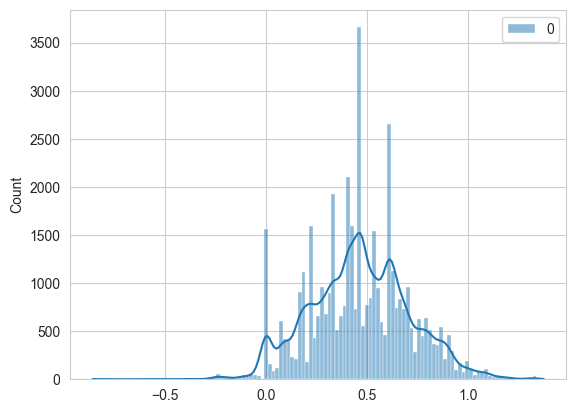

In [20]:
sns.histplot  (preprocessing.PowerTransformer (standardize=False ).fit_transform( np.array(df['Discount']).reshape(-1,1)), kde=True )

(array([1.000e+01, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 2.000e+00, 0.000e+00, 7.000e+00, 0.000e+00,
        7.000e+00, 6.000e+00, 2.000e+00, 3.200e+01, 6.900e+01, 4.200e+01,
        7.000e+00, 8.400e+01, 9.800e+01, 4.800e+01, 1.777e+03, 7.510e+02,
        9.590e+02, 2.148e+03, 2.092e+03, 2.393e+03, 3.148e+03, 3.066e+03,
        3.440e+03, 5.482e+03, 3.195e+03, 4.770e+03, 2.775e+03, 1.801e+03,
        1.727e+03, 1.594e+03, 5.070e+02, 3.420e+02, 2.510e+02, 9.500e+01,
        1.500e+01, 4.300e+01]),
 array([-1.25      , -1.20549538, -1.16099077, -1.11648615, -1.07198154,
        -1.02747692, -0.98297231, -0.93846769, -0.89396308, -0.84945846,
        -0.80495385, -0.76044923, -0.71594462, -0.67144   , -0.62693538,
        -0.58243077, -0.53792615, -0.49342154, -0.44891692, -0.40441231,
        -0.35990769, -0.31540308, -0.27089846, -0.22639385, -0.18188923,
        -0.

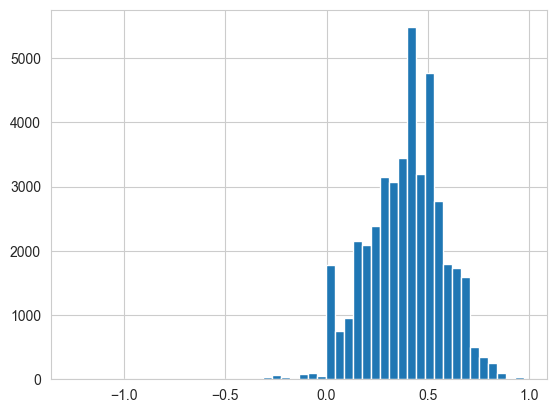

In [11]:
plt.hist (df['Discount'], 50)

In [5]:
from pycaret.regression import *
s = setup(df,  target='Discount' ,  use_gpu = True , n_jobs = 1, polynomial_features = True, train_size = 0.75, fold = 5, imputation_type='iterative')

,Description,Value
0,session_id,2668
1,Target,Discount
2,Original Data,"(42798, 21)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,12
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(29958, 355)"


IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:21:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [23]:
cbc = create_model('xgboost')

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:09:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


OSError: [Errno 22] Invalid argument

In [6]:
data.isna().sum()

Object_UID        0
PriceNoTax        0
GRP               0
Latitude        188
Longitude       184
Population       11
Size           9901
YearNum           0
Month_Id          0
BrandR1         213
Seazon            0
ConstrGroup       0
ExpoType          0
CityType          0
OperatorR1        0
OperatorR2        0
Budget            0
AgentName         0
Dis               0
dtype: int64

In [8]:
data['BrandR1'].value_counts()

1.0    30038
0.0     5045
2.0     3950
3.0     3765
Name: BrandR1, dtype: int64

In [9]:
tuple (data['Size'].value_counts())[0] / data['Size'].value_counts().sum()

0.781546360616128

In [10]:
tuple (data['BrandR1'].value_counts())[0] / data['BrandR1'].value_counts().sum()

0.7018552268797608

In [12]:
data['Dis'].describe()

count    43011.000000
mean        36.826974
std         25.380039
min       -175.000000
25%         20.000000
50%         40.000000
75%         55.000000
max        100.000000
Name: Dis, dtype: float64

<AxesSubplot:xlabel='Dis', ylabel='Count'>

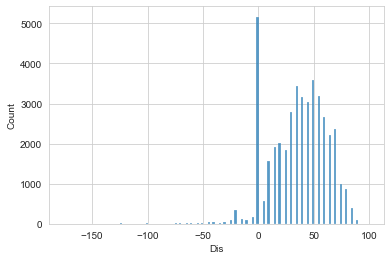

In [14]:
sns.histplot( data=data, x= 'Dis')

In [ ]:
data['BrandR1']=data['BrandR1'].fillna(1)

In [ ]:
data['Latitude']=data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude']=data['Longitude'].fillna(data['Longitude'].mean())
data['Population']=data['Population'].fillna(1196680)

In [ ]:
data['DateStart'] = pd.to_datetime(data.DateStart)

In [ ]:
data=data.drop(['ML_Object_UID', 'sdelka_id', 'ID','Summ_Plan_SMI', 'Unnamed: 0', 'Summ_Fact_SMI', 
                'Summ2PayOperNoTax', 'LN', 'City_Lat', 'City_Lng', 'City_Cat', 'AgentName', 'DateStart'], axis=1)

In [ ]:
data=data.drop(['ML_Object_UID','DateStart', 'LN', 'AgentName'], axis=1)

In [ ]:
data['City_Cat']=8
data['Seller_Cat']=275

In [ ]:
data['Latitude'].mean()

54.7812561855116

In [ ]:
data.info()

In [ ]:
data.sort_values ('DateStart', inplace=True)

In [ ]:
data

,PriceNoTax,Discount,YeraNum,Month_ID,BrandR1,ConstrGroup,ExpositionType,CityType,OperatorR1,OperatorR2,BudgetClass,GRP,Latitude,Longitude,Population,Square,City_Cat,Seller_Cat
0,35000.00,0.171429,1,0,1,2,0,2,0,2,5,5.398128,61.249594,73.439155,380632,18.00,8,56
1,23500.00,0.659574,1,0,1,2,0,4,0,1,5,2.475000,55.037888,73.308052,1154507,18.00,8,236
2,18333.33,0.345454,1,0,3,1,2,4,0,2,5,1.612208,56.819555,60.540267,1493749,9.99,3,262
3,9900.00,-0.124242,1,0,1,0,0,4,2,2,5,1.160000,55.783811,49.149794,1257391,4.20,8,222
4,9900.00,-0.124242,1,0,1,0,0,4,2,2,5,1.160000,55.783811,49.149794,1257391,4.20,8,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42794,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42795,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42796,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115


In [ ]:
dict_ag=pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/!Samples/Owners_main_100.xls')

In [ ]:
dict_ag.iloc [223,:]

Ag    росбизнесцентр
n                224
Name: 223, dtype: object

In [ ]:
dct=dict_ag.values

In [ ]:
data['Lng']=data['Lng'].fillna(44.53)

In [ ]:
data.iat[0,21]

275

In [ ]:
dct[114][0]

'дизайнмастер'

In [ ]:
data['Seller_Cat']=275

In [ ]:
#Матчинг UID с базой гео, заполнение трэйндатасета
for i in range (0, len (data)):
      ag=data.iat[i,18]
      if np.where (dct==ag)[0].size!=0:
            idx=index(dct, ag)[0][0] 
            aname=dct[idx][1]
            data.iat[i,21]=aname

In [ ]:
#train=data.drop(['Size', 'Lat', 'Long', 'Cat'], axis=1)

In [ ]:
train=data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      42798 non-null  int64         
 1   DateStart       42798 non-null  datetime64[ns]
 2   PriceNoTax      42798 non-null  float64       
 3   Discount        42798 non-null  float64       
 4   YeraNum         42798 non-null  int64         
 5   Month_ID        42798 non-null  int64         
 6   BrandR1         42798 non-null  int64         
 7   SeazonClass     42798 non-null  int64         
 8   ConstrGroup     42798 non-null  int64         
 9   ExpositionType  42798 non-null  int64         
 10  CityType        42798 non-null  int64         
 11  OperatorR1      42798 non-null  int64         
 12  OperatorR2      42798 non-null  int64         
 13  BudgetClass     42798 non-null  int64         
 14  GRP             42798 non-null  float64       
 15  La

In [ ]:
cols=train.columns.to_list()
cols

['PriceNoTax',
 'Discount',
 'GRP',
 'YearNum',
 'Month_Id',
 'BrandR1',
 'Seazon',
 'ConstrGroup',
 'ExpoType',
 'CityType',
 'OperatorR1',
 'OperatorR2',
 'Budget',
 'Lat',
 'Lng',
 'ID',
 'Sqr',
 'Seller']

In [ ]:
col_cat=[ 'BrandR1', 
 'OperatorR1',
 'Seazon',
 'ExpoType',
 'CityType',
 'Budget',
 'Cat']

In [ ]:
train=pd.get_dummies (train, columns=['Seller_Cat'])

In [ ]:
train

,PriceNoTax,Discount,YeraNum,Month_ID,BrandR1,ConstrGroup,ExpositionType,CityType,OperatorR1,OperatorR2,BudgetClass,GRP,Latitude,Longitude,Population,Square,City_Cat,Seller_Cat
0,35000.00,0.171429,1,0,1,2,0,2,0,2,5,5.398128,61.249594,73.439155,380632,18.00,8,56
1,23500.00,0.659574,1,0,1,2,0,4,0,1,5,2.475000,55.037888,73.308052,1154507,18.00,8,236
2,18333.33,0.345454,1,0,3,1,2,4,0,2,5,1.612208,56.819555,60.540267,1493749,9.99,3,262
3,9900.00,-0.124242,1,0,1,0,0,4,2,2,5,1.160000,55.783811,49.149794,1257391,4.20,8,222
4,9900.00,-0.124242,1,0,1,0,0,4,2,2,5,1.160000,55.783811,49.149794,1257391,4.20,8,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42793,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42794,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42795,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115
42796,23000.00,0.400000,3,5,1,2,0,3,2,4,3,2.760000,53.334602,83.669099,632391,18.00,8,115


In [ ]:
hold=train.iloc[40000:,:]

In [ ]:
train_data=train.iloc[:40000,:]

In [ ]:
train_data

,PriceNoTax,Discount,YeraNum,Month_ID,BrandR1,SeazonClass,ConstrGroup,ExpositionType,CityType,OperatorR1,OperatorR2,BudgetClass,GRP,Latitude,Longitude,Population,Seller_Cat
0,32000.0,0.249062,1,0,1,0,2,0,4,2,4,5,2.070000,54.989864,82.913353,1625631,115
1,7700.0,0.376623,1,0,3,0,2,0,1,0,1,5,16.569302,56.994742,61.468938,62908,275
2,7500.0,0.333333,1,0,3,0,0,0,4,0,2,5,1.870000,56.835452,60.622364,1493749,262
3,25190.0,0.702263,1,0,1,0,2,0,4,2,4,5,1.920000,54.998824,73.277923,1154507,115
4,33000.0,0.250000,1,0,3,0,2,0,4,0,1,5,2.421667,56.830672,60.670603,1493749,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,32800.0,0.451220,3,3,1,1,2,0,2,0,2,1,8.548470,64.564203,39.783300,181990,178
39996,32900.0,0.600608,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,222
39997,32900.0,0.600608,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,222
39998,32900.0,0.600608,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,222


In [ ]:
X=train_data.drop('Discount', axis=1)
y=train_data.pop('Discount')


In [ ]:
hold_test=hold.drop('Discount', axis=1)
hold_label=hold.pop('Discount')

In [ ]:
hold_label

37513    0.409974
783      0.600608
782      0.600608
781      0.600608
37519    0.350000
           ...   
5169     0.400000
5168     0.400000
5167     0.384615
19819    0.100000
11635    0.400000
Name: Discount, Length: 2798, dtype: float64

In [ ]:
train.iat[42797,1]

23000.0

In [ ]:
train=pd.get_dummies (train, columns=col_cat)

In [ ]:
data.info()

In [ ]:
X

In [ ]:
#train=train.drop(['CityType', 'OperatorR1'], axis=1)

In [ ]:
X

,PriceNoTax,YeraNum,Month_ID,BrandR1,SeazonClass,ConstrGroup,ExpositionType,CityType,OperatorR1,OperatorR2,BudgetClass,GRP,Latitude,Longitude,Population,Seller_Cat_1,Seller_Cat_2,Seller_Cat_8,Seller_Cat_9,Seller_Cat_13,Seller_Cat_15,Seller_Cat_17,Seller_Cat_18,Seller_Cat_19,Seller_Cat_20,Seller_Cat_21,Seller_Cat_22,Seller_Cat_24,Seller_Cat_27,Seller_Cat_29,Seller_Cat_30,Seller_Cat_31,Seller_Cat_36,Seller_Cat_39,Seller_Cat_40,Seller_Cat_42,Seller_Cat_44,Seller_Cat_46,Seller_Cat_47,Seller_Cat_48,...,Seller_Cat_223,Seller_Cat_224,Seller_Cat_225,Seller_Cat_226,Seller_Cat_227,Seller_Cat_228,Seller_Cat_230,Seller_Cat_231,Seller_Cat_233,Seller_Cat_235,Seller_Cat_236,Seller_Cat_237,Seller_Cat_238,Seller_Cat_240,Seller_Cat_242,Seller_Cat_245,Seller_Cat_246,Seller_Cat_247,Seller_Cat_248,Seller_Cat_249,Seller_Cat_250,Seller_Cat_251,Seller_Cat_252,Seller_Cat_254,Seller_Cat_255,Seller_Cat_256,Seller_Cat_257,Seller_Cat_259,Seller_Cat_261,Seller_Cat_262,Seller_Cat_263,Seller_Cat_264,Seller_Cat_265,Seller_Cat_266,Seller_Cat_267,Seller_Cat_268,Seller_Cat_270,Seller_Cat_272,Seller_Cat_274,Seller_Cat_275
0,32000.0,1,0,1,0,2,0,4,2,4,5,2.070000,54.989864,82.913353,1625631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7700.0,1,0,3,0,2,0,1,0,1,5,16.569302,56.994742,61.468938,62908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7500.0,1,0,3,0,0,0,4,0,2,5,1.870000,56.835452,60.622364,1493749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,25190.0,1,0,1,0,2,0,4,2,4,5,1.920000,54.998824,73.277923,1154507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33000.0,1,0,3,0,2,0,4,0,1,5,2.421667,56.830672,60.670603,1493749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,32800.0,3,3,1,1,2,0,2,0,2,1,8.548470,64.564203,39.783300,181990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,32900.0,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,32900.0,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,32900.0,3,3,1,1,2,0,4,2,2,3,1.030000,58.005581,56.121909,1055397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_hold= xgb.DMatrix(hold_test, label=hold_label)

In [ ]:
params = {'max_depth': 50, 
          'eta': 0.45, 
          'objective': 'reg:squarederror', 
          "subsample": 1,
          'min_child_weight' : 1,
          'tree_method' : 'hist'
          }

In [ ]:
model_train = xgb.train(params, xgb_train, 2000, evals = [(xgb_test, "test")], verbose_eval=100)

In [ ]:
train_data, test_data = model_selection.train_test_split(train, train_size=0.8)
test_labels=test_data.pop ('Discount').values
train_labels=train_data.pop ('Discount').values

In [ ]:
myXGB=xgb.XGBRegressor (learning_rate=0.03, verbose=1, n_estimators=1500, min_child_weight=2, n_jobs=3, objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=50)
myXGB.fit (train_data, train_labels)
a=myXGB.predict (test_data)
mae=metrics.mean_absolute_error (test_labels, a)
        

In [ ]:
a=model_train.predict (xgb_hold)
mae=metrics.mean_absolute_error (hold_label, a)

In [ ]:
print ('mae', mae, 'share', len(list_d)/len(diff)*100 )

mae 0.17241318842367598 share 79.12794853466762


In [ ]:
X

In [ ]:
myscorer = metrics.make_scorer(my_custom_loss_func, greater_is_better=False)
cvs=model_selection.cross_val_score (myXGB, train_data, train_labels, scoring=myscorer, cv=3)
cvs

array([-8.61384567, -8.01047952, -8.01047952])

In [ ]:
diff=list(hold_label- a)
list_d = [x for x in diff if x <-0.05 or x > 0.05]

In [ ]:
len(list_d)

455

In [ ]:
metrics.r2_score (a, y_test)

0.9769958378682042

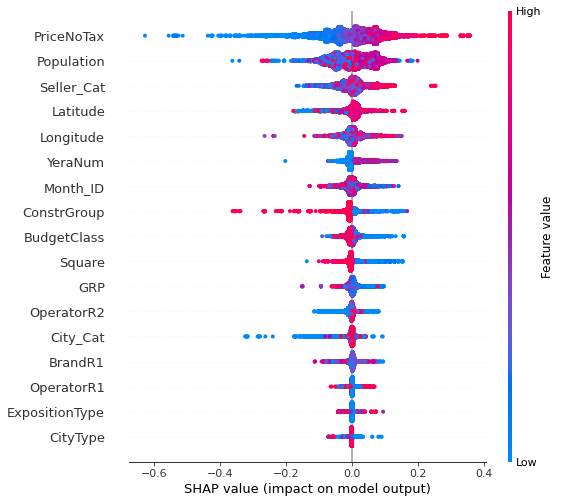

In [ ]:
fts=shap.TreeExplainer (model_train).shap_values(X)
shap.summary_plot(fts, X) 

In [ ]:
pd.DataFrame(diff*100).plot(kind='hist')

In [ ]:
fg

In [ ]:
xgb.plot_importance (myXGB, ax=None, height=0.6, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features',  
                     importance_type='weight',  max_num_features=20, grid=True, show_values=False)

NameError: ignored

In [ ]:
fg

In [ ]:
pred=pd.DataFrame(a)
pred

In [ ]:
y=pd.DataFrame(test_labels)
y

In [ ]:
test=test_data.values

In [ ]:
cols=test_data.columns.to_list()

In [ ]:
cols.append ('Pred')

In [ ]:
res1=pd.concat([pd.DataFrame(test), res], axis=1, join='inner',  )
res1.set_axis(cols, axis=1, inplace=True)

In [ ]:
res1.set_axis(cols, axis=1, inplace=True)

In [ ]:
res1

In [ ]:
pd.DataFrame(diff).plot(kind='hist', bins=40)

In [ ]:
sns.histplot (diff, stat='density')

In [ ]:
xgb.plot_importance (myXGB, ax=None, height=0.6, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features',  
                     importance_type='weight',  max_num_features=20, grid=True, show_values=False)

In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/!Samples/New_set_0906_with_SC.xlsx') as writer:
    pd.DataFrame (data).to_excel(writer)

А теперь про итоги экспериментов с сужением базы, наиболее оптимальный вариант: это сужение по двум признакам: бюджет и количество конструкций у селлера. Если из датасета выбрать только селлеров у которых свыше 900 конструкций и с оборотами более 10 млн, то алгоритм дает среднее абсолютное отклонение около 1%, при этом доля прогнозов с отклонением не более 5% от образца, составялет около 95%. Этот сегмент составляет около половины всего датасета (14 856 объектов из 28 954)  

In [ ]:
standard = preprocessing.StandardScaler().fit(train_data)

X_train_normalized = standard.transform(train_data)
X_val_normalized = standard.transform(test_data)

pc_train = decomposition.PCA(n_components=50).fit(X_train_normalized)

plt.figure(figsize=(8, 6))
plt.xlabel('n components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.plot(range(pc_train.n_components_), pc_train.explained_variance_ratio_);

In [ ]:
label = train_labels.tolist()
colors = ['red','black']

fig = plt.figure(figsize=(8,8))
plt.scatter(pc_train.transform(X_train_normalized)[:, 0], pc_train.transform(X_train_normalized)[:, 1], c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels([0, 1])

In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/!Samples/New_DataSet_0906_prep_2.xlsx') as writer:
   pd.DataFrame (data).to_excel(writer)